### فراخوانی داه

In [354]:
import pandas as pd

main_data = pd.read_csv("D:/venv1/final_pre_last.csv")

### فراخوانی کتابخانه های مورد نیاز

In [355]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### برداشتن محدودیت نمایش ستون ها

In [356]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### حذف سطرهای خالی

In [357]:
df = main_data.copy()

In [358]:
df = df.dropna(subset=['adjusted_price_value', 'location_latitude', 'location_longitude'])
print(f"Remaining rows after filtering: {df.shape[0]}")


Remaining rows after filtering: 466586


In [359]:
# تغییر نام برای درک بهتر و قاطی نکردن
df.rename(columns={'lat': 'lat_city', 'long': 'long_city'}, inplace=True)

In [360]:
df.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'land_size',
       'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'construction_year', 'is_rebuilt', 'location_latitude',
       'location_longitude', 'big_city', 'luxury', 'basic', 'extra_features',
       'lat_city', 'long_city', 'easting', 'northing', 'zone_number',
       'zone_letter', 'adjusted_price_value'],
      dtype='object')

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466586 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             466586 non-null  object 
 1   city_slug             466586 non-null  object 
 2   neighborhood_slug     466586 non-null  object 
 3   land_size             466586 non-null  float64
 4   building_size         466586 non-null  float64
 5   deed_type             466586 non-null  object 
 6   has_business_deed     466586 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438026 non-null  object 
 9   construction_year     438029 non-null  float64
 10  is_rebuilt            466586 non-null  bool   
 11  location_latitude     466586 non-null  float64
 12  location_longitude    466586 non-null  float64
 13  big_city              466586 non-null  int64  
 14  luxury                466586 non-null  int64  
 15  

In [362]:
df = df.dropna(subset=['construction_year'])

In [363]:
df['construction_year'] = df['construction_year'].astype(int)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438029 entries, 0 to 466585
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cat3_slug             438029 non-null  object 
 1   city_slug             438029 non-null  object 
 2   neighborhood_slug     438029 non-null  object 
 3   land_size             438029 non-null  float64
 4   building_size         438029 non-null  float64
 5   deed_type             438029 non-null  object 
 6   has_business_deed     438029 non-null  bool   
 7   floor                 322089 non-null  object 
 8   rooms_count           438014 non-null  object 
 9   construction_year     438029 non-null  int64  
 10  is_rebuilt            438029 non-null  bool   
 11  location_latitude     438029 non-null  float64
 12  location_longitude    438029 non-null  float64
 13  big_city              438029 non-null  int64  
 14  luxury                438029 non-null  int64  
 15  basic

### استفاده از دسته تکرار داده های متنی به جای اسم آنها برای عددی سازی ستون

In [365]:
freq_encoding = df['cat3_slug'].value_counts()
df['cat3_slug_freq'] = df['cat3_slug'].map(freq_encoding)

cat3_counts = df['cat3_slug'].value_counts()

df_counts = cat3_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,apartment-sell,186545
1,apartment-rent,123786
2,house-villa-sell,50284
3,house-villa-rent,33320
4,shop-rent,21713
5,office-rent,9485
6,shop-sell,8325
7,office-sell,2274
8,industry-agriculture-business-rent,1661
9,industry-agriculture-business-sell,636


In [366]:
freq_encoding = df['deed_type'].value_counts()
df['deed_type_freq'] = df['deed_type'].map(freq_encoding)

deed_type_counts = df['deed_type'].value_counts()

df_counts = deed_type_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,unselect,285215
1,single_page,116325
2,written_agreement,19682
3,other,13500
4,multi_page,3307


In [367]:
freq_encoding = df['neighborhood_slug'].value_counts()
df['neighborhood_slug_n'] = df['neighborhood_slug'].map(freq_encoding)

neighborhood_counts = df['neighborhood_slug'].value_counts()

df_counts = neighborhood_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,unknown,19935
1,andisheh-new-town,14402
2,pardis-city,8262
3,parand-city,7214
4,eslamshahr,5802
...,...,...
1567,rudbartan,1
1568,ansar-alhosein,1
1569,bojaye,1
1570,abasiab,1


In [368]:
freq_encoding = df['is_rebuilt'].value_counts()
df['is_rebuilt_n'] = df['is_rebuilt'].map(freq_encoding)

city_counts = df['is_rebuilt'].value_counts()

df_counts = city_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts

,category,count
0,False,318954
1,True,119075


In [369]:
freq_encoding = df['city_slug'].value_counts()
df['city_slug_n'] = df['city_slug'].map(freq_encoding)

city_counts = df['city_slug'].value_counts()

df_counts = city_counts.reset_index()
df_counts.columns = ['category', 'count']
df_counts


,category,count
0,tehran,93612
1,karaj,29270
2,mashhad,28635
3,isfahan,17089
4,andisheh-new-town,14402
...,...,...
412,zahak,1
413,goli-dagh,1
414,anbaralum,1
415,maraveh-tapeh,1


### حذف ستون های اضافی

In [370]:
df = df.drop(['city_slug','neighborhood_slug','rooms_count','floor','deed_type','cat3_slug','has_business_deed'],axis=1)

In [371]:
df = df.drop(['long_city','lat_city', 'big_city'],axis=1)

In [372]:
df.columns

Index(['land_size', 'building_size', 'construction_year', 'is_rebuilt',
       'location_latitude', 'location_longitude', 'luxury', 'basic',
       'extra_features', 'easting', 'northing', 'zone_number', 'zone_letter',
       'adjusted_price_value', 'cat3_slug_freq', 'deed_type_freq',
       'neighborhood_slug_n', 'is_rebuilt_n', 'city_slug_n'],
      dtype='object')

In [373]:
df = df.drop(['is_rebuilt'],axis=1)

In [374]:
df = df.drop(['zone_letter'],axis=1)
df = df.drop(['zone_number','northing','easting'],axis=1)

### اسکیل کردن 

In [375]:
df_scal = df.copy()

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438029 entries, 0 to 466585
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   land_size             438029 non-null  float64
 1   building_size         438029 non-null  float64
 2   construction_year     438029 non-null  int64  
 3   location_latitude     438029 non-null  float64
 4   location_longitude    438029 non-null  float64
 5   luxury                438029 non-null  int64  
 6   basic                 438029 non-null  int64  
 7   extra_features        438029 non-null  int64  
 8   adjusted_price_value  438029 non-null  float64
 9   cat3_slug_freq        438029 non-null  int64  
 10  deed_type_freq        438029 non-null  int64  
 11  neighborhood_slug_n   438029 non-null  int64  
 12  is_rebuilt_n          438029 non-null  int64  
 13  city_slug_n           438029 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 50.1 MB


In [377]:
df = df.drop(['deed_type_freq','is_rebuilt_n'],axis=1)

In [378]:

scaler = StandardScaler()

try:
    X_scaled = scaler.fit_transform(df)
except ValueError as e:
    print("Error during scaling:", e)
    raise


### مدل سازی و آموزش

In [379]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=23)
df['cluster'] = kmeans.fit_predict(X_scaled)

### نمایش

In [380]:
centroids_latlon = df.groupby('cluster')[['location_latitude', 'location_longitude']].mean().reset_index()

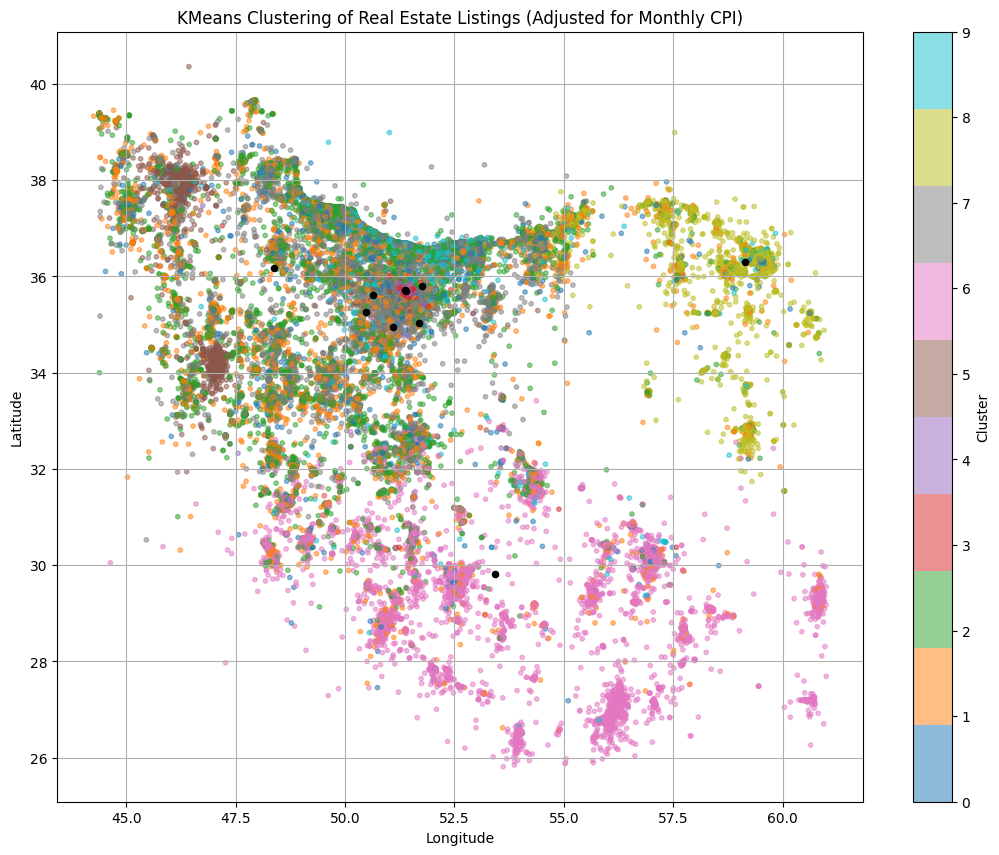

In [381]:
df_scall=df[df['cluster'].notna()]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)
plt.scatter(centroids_latlon['location_longitude'], centroids_latlon['location_latitude'],
            c='black', s=20, marker='o', label='Centers')
plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

### اطلاعات جهت تحلیل هر دسته

In [382]:
df.groupby('cluster').describe()

land_size                                                       \
            count        mean        std   min         25%         50%   
cluster                                                                  
0         38270.0  247.421287  47.885226  76.0  211.666667  241.666667   
1         55562.0   79.632645  36.878819  25.0   50.000000   75.000000   
2         37505.0  218.817900  72.936025  25.0  170.000000  200.000000   
3         48829.0  100.450531  26.168583  25.0   83.333333  100.000000   
4         38679.0  154.510785  36.447294  25.0  126.666667  150.000000   
5         32260.0  134.745144  60.499476  25.0   90.000000  121.666667   
6         39844.0  170.087667  54.077964  25.0  133.333333  166.666667   
7         98837.0  140.241927  29.616267  25.0  120.000000  141.666667   
8         30494.0  154.889618  48.642802  25.0  125.000000  150.000000   
9         17749.0  208.325408  76.551655  50.0  148.333333  200.000000   

                           building_size                                      \
                75%    max         count        mean        std   min    25%   
cluster                                                                        
0        275.000000  485.0       38270.0  148.705409  27.950282  30.0  128.0   
1        102.000000  315.0       55562.0   54.728591  25.824327  10.0   30.0   
2        250.000000  489.0       37505.0  138.947554  38.512240  10.0  110.0   
3        116.666667  300.0       48829.0   61.052366  16.223034  10.0   50.0   
4        178.333333  400.0       38679.0   93.162853  22.225833  15.0   77.0   
5        166.666667  480.0       32260.0   85.040515  38.004069  12.0   56.0   
6        200.000000  480.0       39844.0  107.448700  32.090076  10.0   85.0   
7        160.000000  300.0       98837.0   84.750053  17.421632  10.0   75.0   
8        183.333333  480.0       30494.0   97.285335  28.582053  10.0   78.0   
9        250.000000  489.0       17749.0  115.804890  39.818657  10.0   85.0   

                             construction_year                          \
           50%    75%    max             count         mean        std   
cluster                                                                  
0        145.0  165.0  232.0           38270.0  1399.396342   4.572995   
1         55.0   75.0  170.0           55562.0  1390.753267   9.033265   
2        130.0  161.0  232.0           37505.0  1391.568058  10.147058   
3         60.0   70.0  185.0           48829.0  1387.286080   7.865694   
4         90.0  107.0  230.0           38679.0  1394.300189   7.306119   
5         75.0  106.0  232.0           32260.0  1393.635772   7.537941   
6        102.0  125.0  232.0           39844.0  1394.005923   7.363977   
7         85.0   97.0  170.0           98837.0  1395.073576   6.061826   
8         93.0  115.0  230.0           30494.0  1394.556372   7.277500   
9        105.0  140.0  232.0           17749.0  1399.076680   5.171145   

                                                location_latitude             \
            min     25%     50%     75%     max             count       mean   
cluster                                                                        
0        1369.0  1397.0  1401.0  1403.0  1403.0           38270.0  35.027373   
1        1369.0  1385.0  1392.0  1398.0  1403.0           55562.0  34.946302   
2        1369.0  1385.0  1394.0  1401.0  1403.0           37505.0  35.251864   
3        1369.0  1383.0  1387.0  1393.0  1403.0           48829.0  35.692736   
4        1369.0  1390.0  1395.0  1400.0  1403.0           38679.0  35.723755   
5        1369.0  1390.0  1395.0  1399.0  1403.0           32260.0  36.171562   
6        1369.0  1390.0  1395.0  1400.0  1403.0           39844.0  29.812861   
7        1369.0  1390.0  1395.0  1400.0  1403.0           98837.0  35.622555   
8        1369.0  1390.0  1395.0  1401.0  1403.0           30494.0  36.306567   
9        1369.0  1397.0  1401.0  1403.0  1403.0           17749.0  35.807100   



### نمایش هر دسته

In [383]:
df_one = df_scal.copy()

In [384]:
df_one

,land_size,building_size,construction_year,location_latitude,location_longitude,luxury,basic,extra_features,adjusted_price_value,cat3_slug_freq,deed_type_freq,neighborhood_slug_n,is_rebuilt_n,city_slug_n
0,166.666667,100.0,1393,35.729832,51.505466,0,3,0,9.666667e+09,186545,285215,243,318954,93612
1,130.000000,78.0,1396,35.712364,50.794781,0,4,3,7.222222e+08,186545,116325,935,119075,935
2,145.000000,87.0,1403,35.778664,51.757549,0,4,3,2.888889e+09,186545,13500,8262,119075,8262
3,151.666667,91.0,1385,35.733952,51.380608,0,3,0,1.333333e+10,123786,285215,338,119075,93612
4,281.666667,169.0,1403,36.321831,59.524502,0,4,3,1.443333e+10,186545,116325,645,318954,28635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466581,233.333333,140.0,1401,37.505325,45.050369,0,4,0,4.444444e+09,186545,285215,5191,318954,5191
466582,151.666667,91.0,1388,35.652096,51.323963,0,2,3,4.000000e+09,186545,116325,129,119075,93612
466583,83.333333,50.0,1386,36.374050,59.485794,0,2,1,2.222222e+09,123786,285215,2632,119075,28635
466584,300.000000,180.0,1403,34.350235,47.083241,0,3,0,8.300000e+09,186545,285215,19935,318954,8317


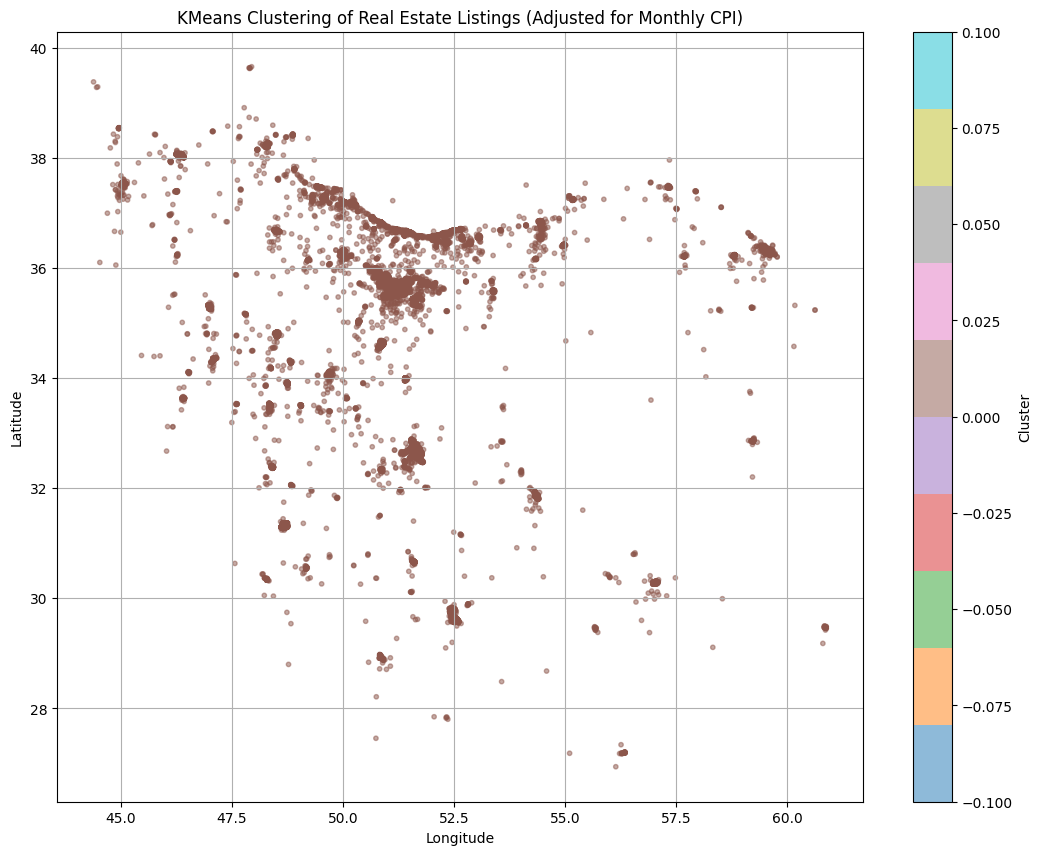

In [385]:


df_scall=df[df['cluster'] == 0]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

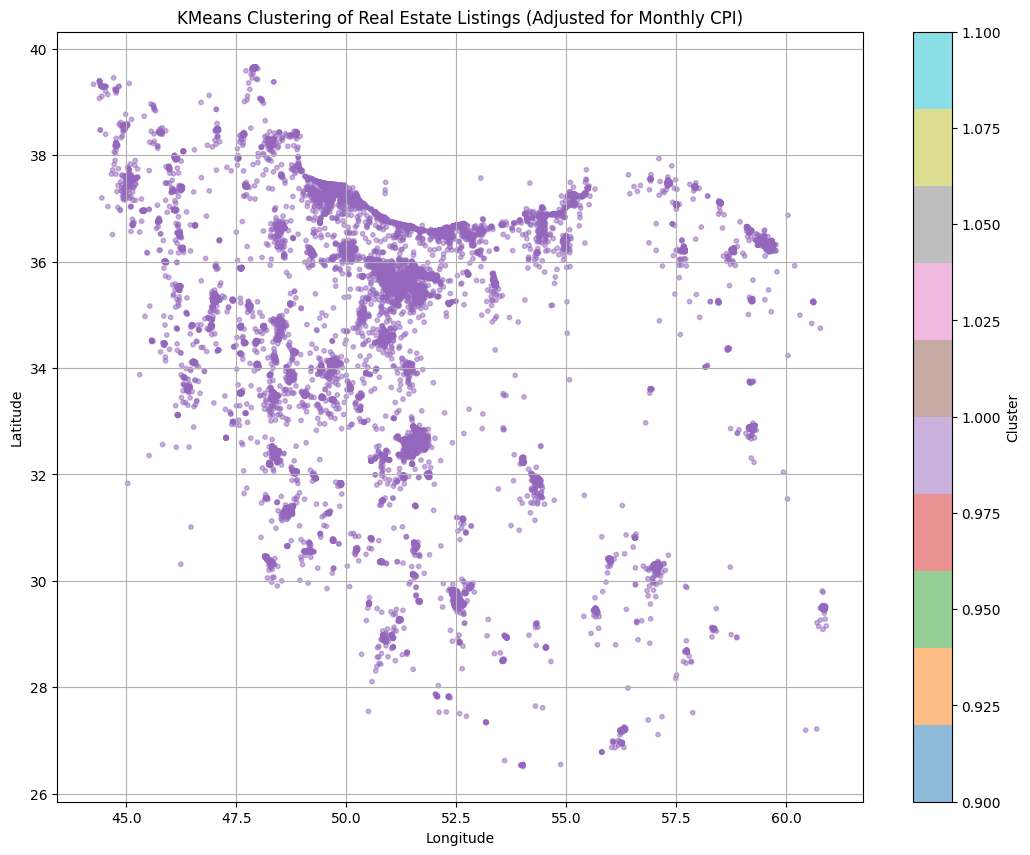

In [386]:
df_scall=df[df['cluster'] ==1]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

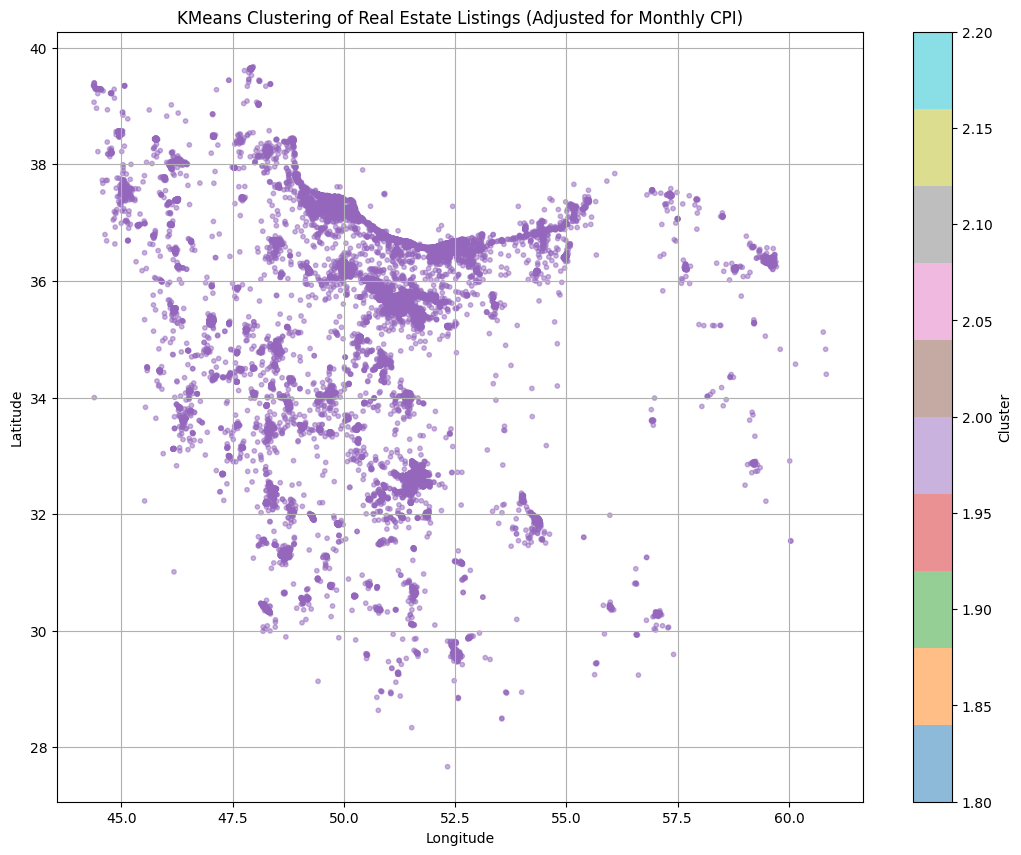

In [387]:
df_scall=df[df['cluster'] == 2]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

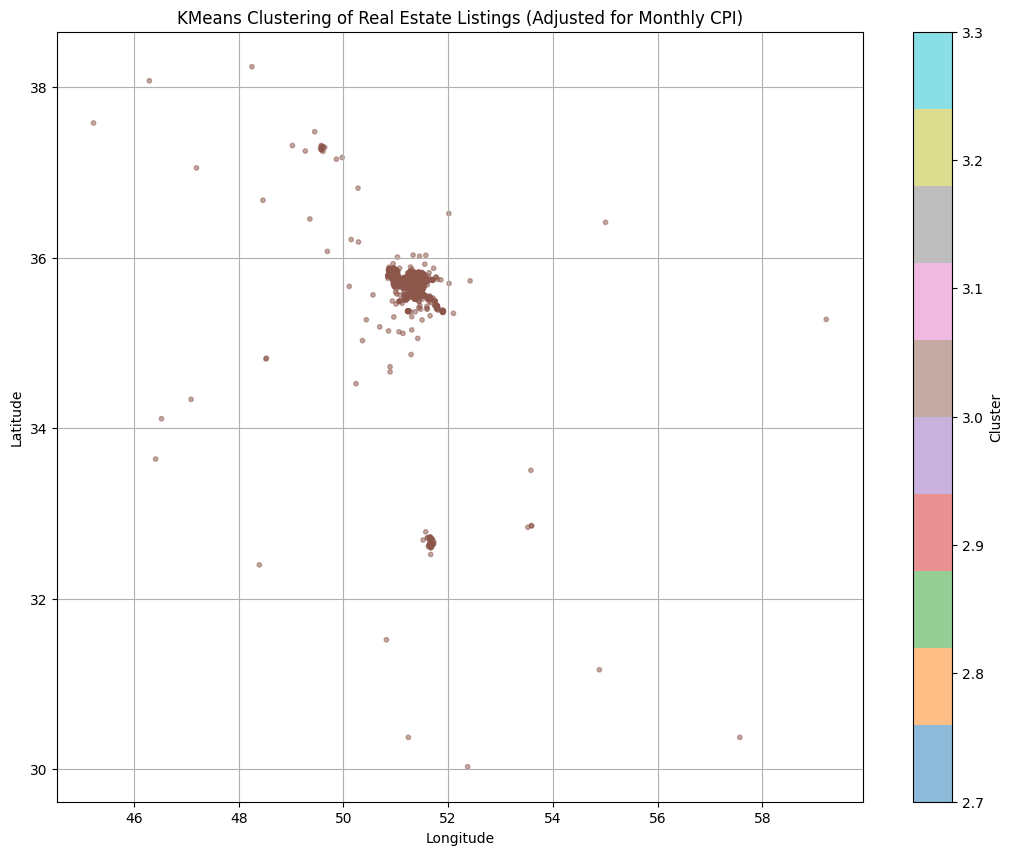

In [388]:
df_scall=df[df['cluster'] == 3]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

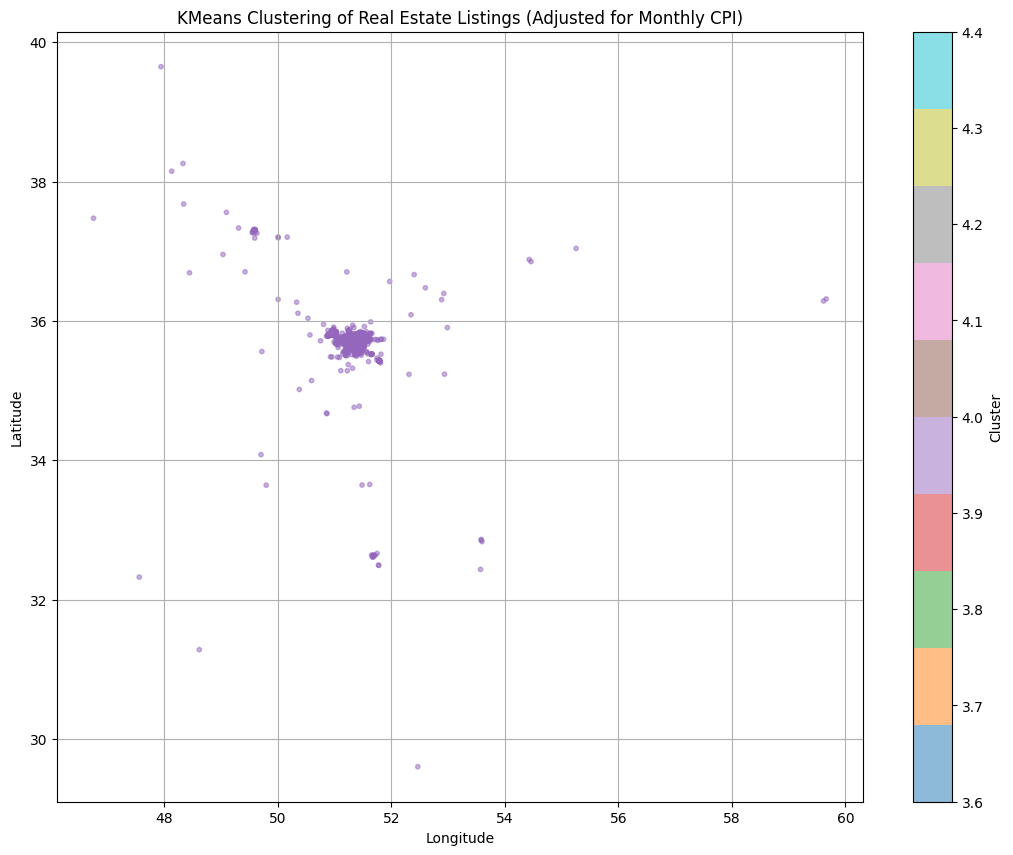

In [389]:
df_scall=df[df['cluster'] == 4]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

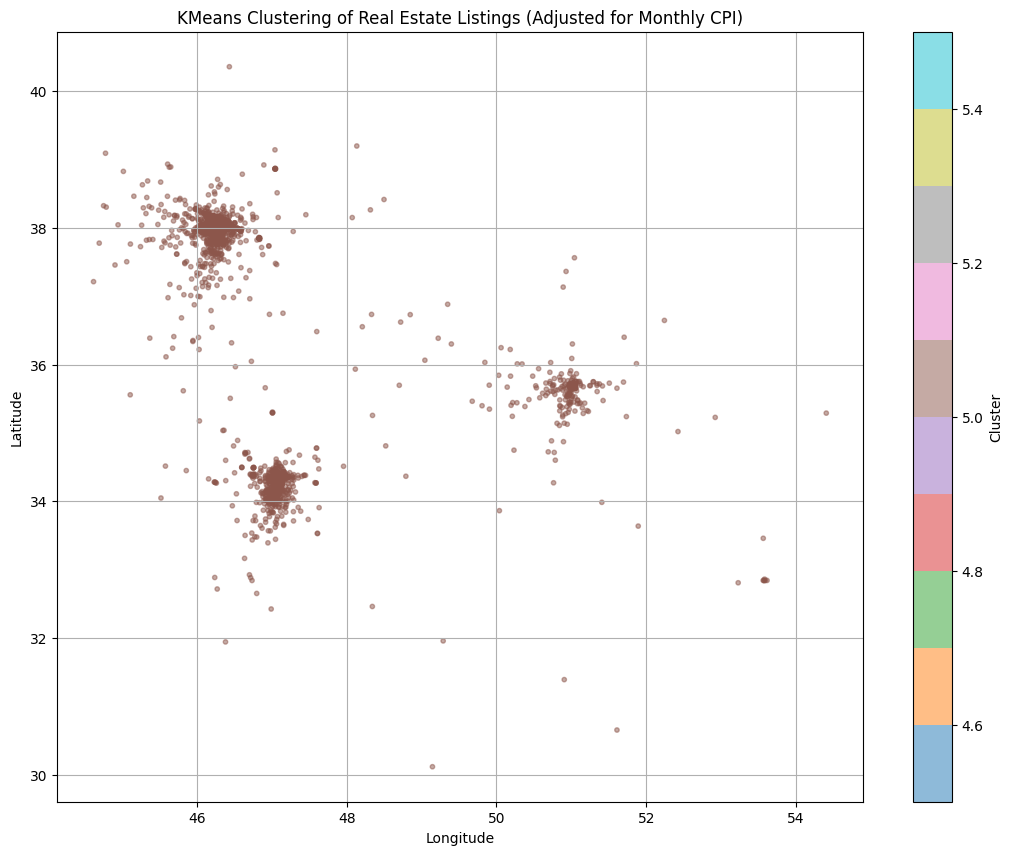

In [390]:
df_scall=df[df['cluster'] == 5]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

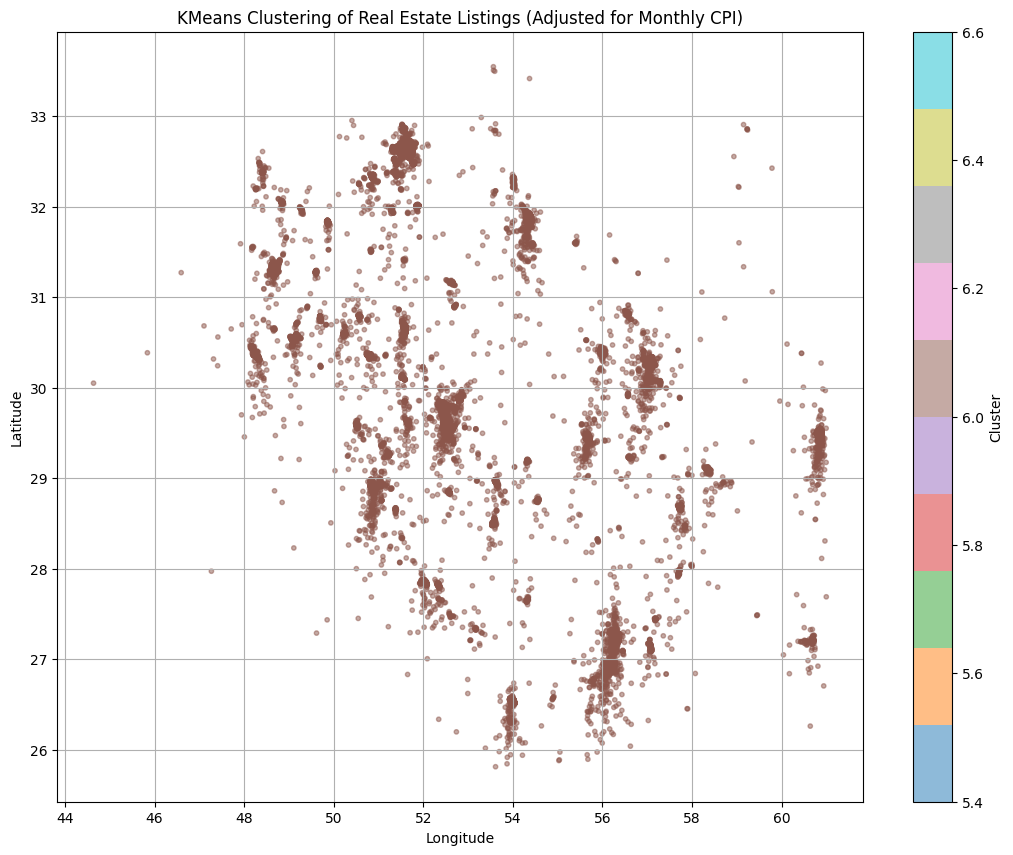

In [391]:
df_scall=df[df['cluster'] == 6]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

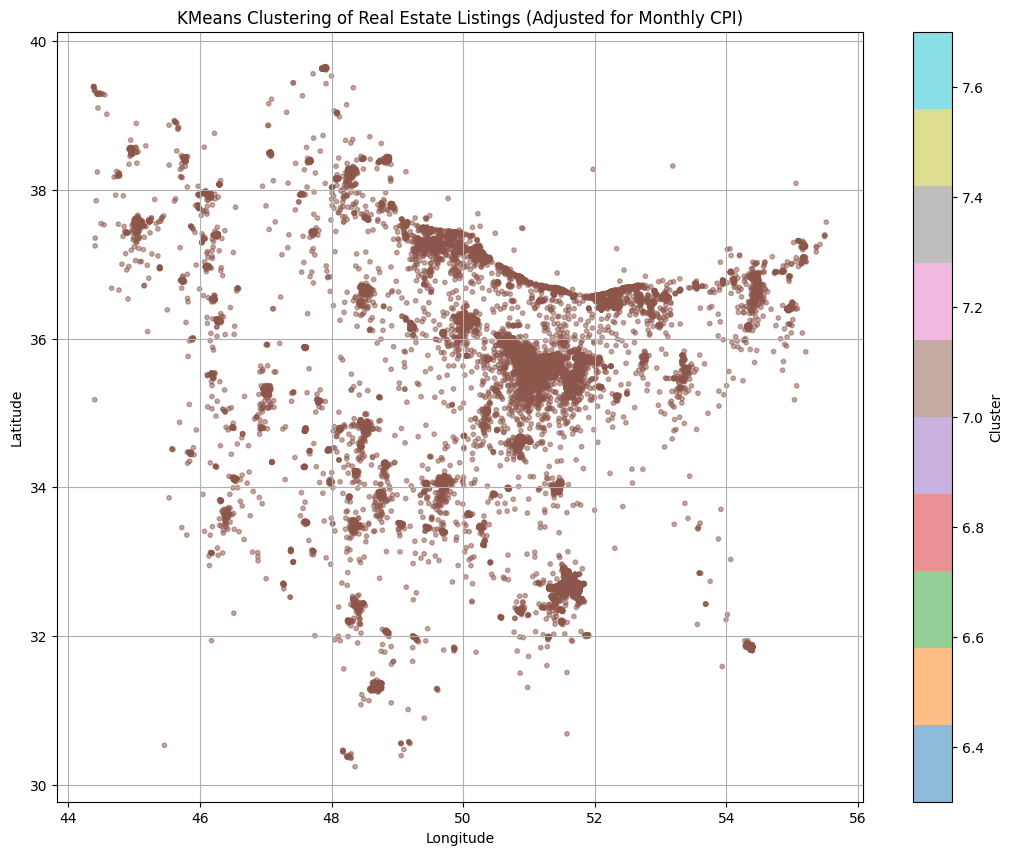

In [392]:
df_scall=df[df['cluster'] ==7]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

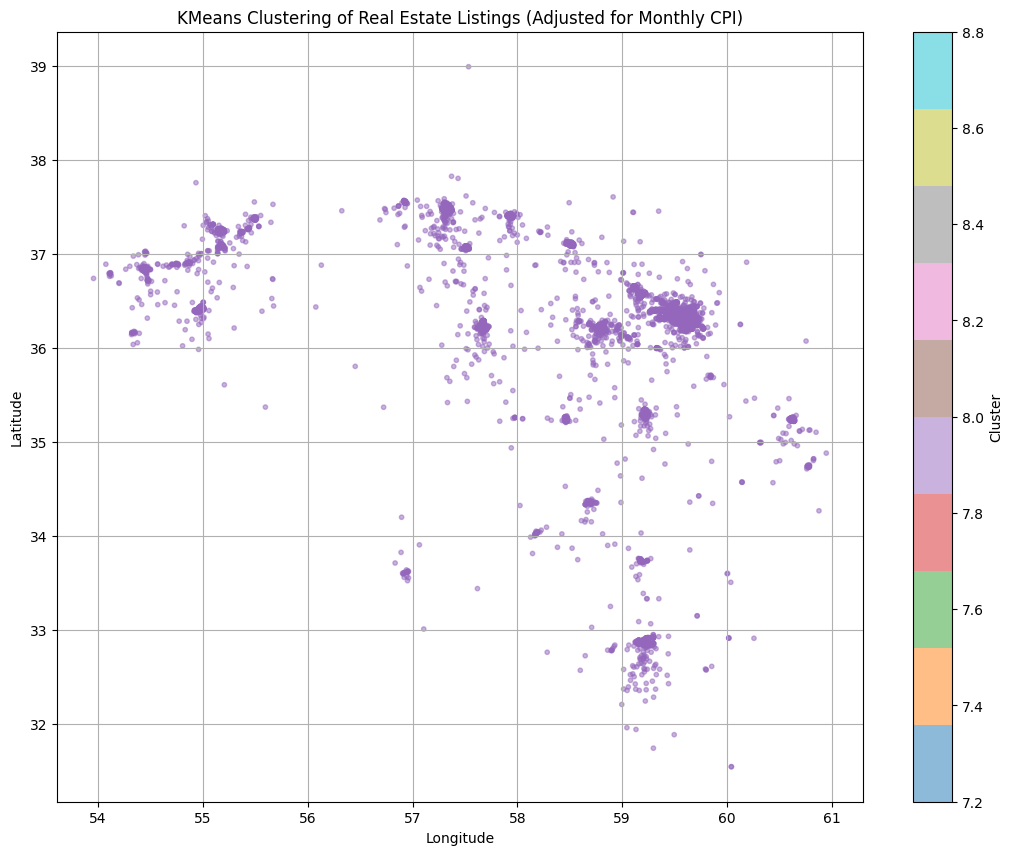

In [393]:
df_scall=df[df['cluster'] == 8]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()

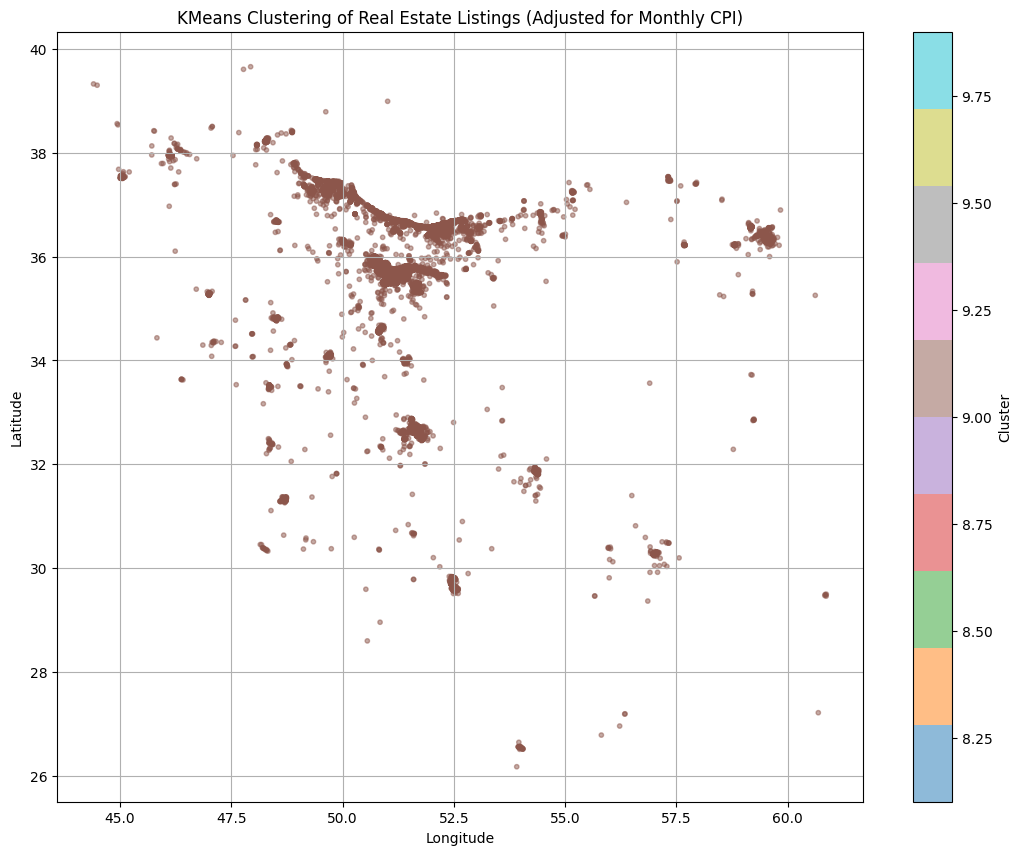

In [394]:
df_scall=df[df['cluster'] == 9]
plt.figure(figsize=(13, 10))
scatter = plt.scatter( (df_scall['location_longitude']),(df_scall['location_latitude']), c=df_scall['cluster'], cmap='tab10', alpha=0.5, s=10)

plt.colorbar(scatter, label='Cluster')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("KMeans Clustering of Real Estate Listings (Adjusted for Monthly CPI)")
plt.grid(True)
plt.show()